# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

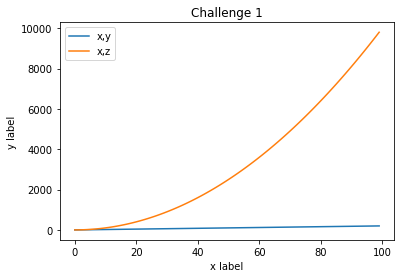

In [3]:
# Method 1
plt.plot(x, y, label='x,y')
plt.plot(x,z, label='x,z') 
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Challenge 1")
plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

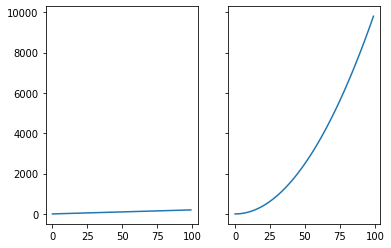

In [4]:
# Method 2
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax2.plot(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

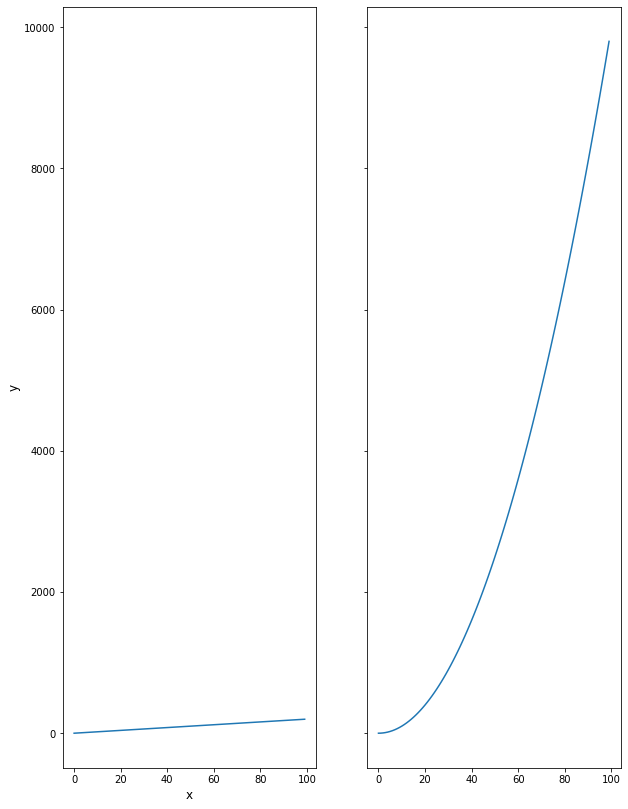

In [5]:
# your code here
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,14))
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.plot(x, y)
ax2.plot(x, z)

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

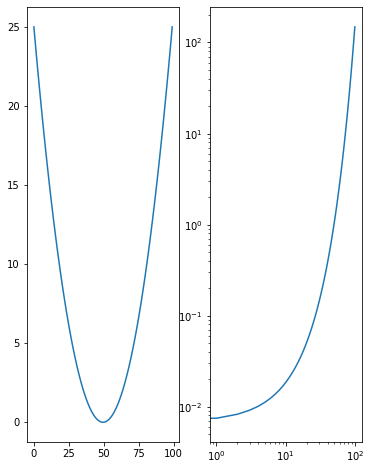

In [6]:
# your code here
x = x**2
y = np.exp(x)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(6, 8))

x = np.linspace(-5,5,100)
y1 = x**2
y2 = np.exp(x)
ax1.plot(y1, linewidth = 1.5)
ax2.plot(y2, linewidth = 1.5)
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [7]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv('fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

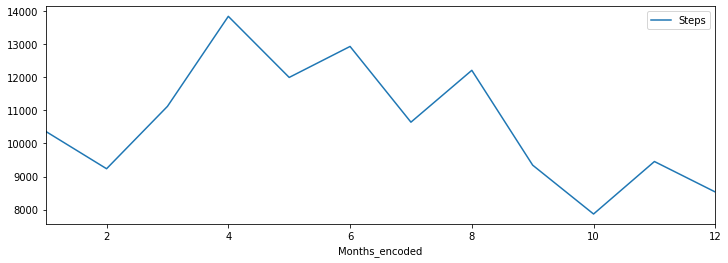

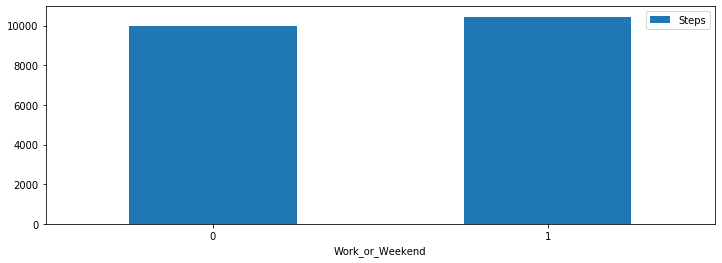

In [9]:
df = pd.DataFrame(fitbit)

# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_month = df.groupby(by = ['Months_encoded']).agg({'Steps':np.median})

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
steps_week = df.groupby(by = ['Work_or_Weekend']).agg({'Steps':np.median})

#Plots
steps_month_plot = steps_month.plot(figsize=(12,4))
plt.savefig('steps_month_plot')
steps_week_plot = steps_week.plot.bar(xticks = steps_week.index, rot = 0, figsize=(12,4))
plt.savefig('steps_week_plot')


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

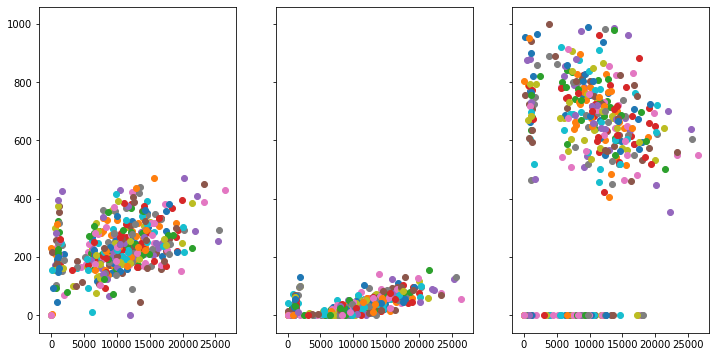

In [10]:
# your code here
mla = df['Minutes Lightly Active']
stp = df['Steps']
mva = df['Minutes Very Active']
sed = df['Minutes Sedentary']
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,6))

for i in range(len(stp)):
    ax1.scatter(stp[i], mla[i])
    ax2.scatter(stp[i], mva[i])
    ax3.scatter(stp[i], sed[i])



## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
# your code here
titanic = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [12]:
# your code here
df = pd.DataFrame(titanic)
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
# your code here
num = df.select_dtypes(exclude='object')
num.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [14]:
# CATEGORICAL VARIABLES
# your code here
cat = df.select_dtypes(include='object')
cat.dtypes

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

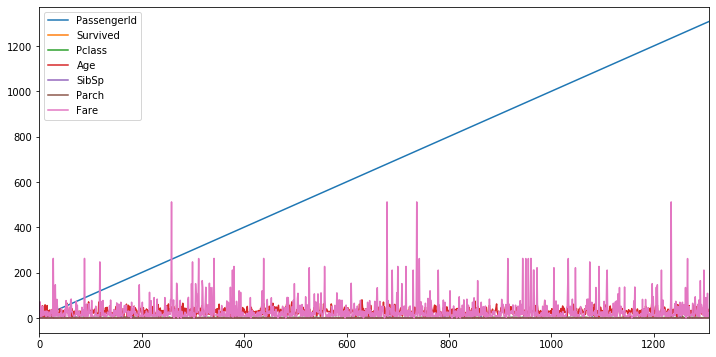

In [15]:
# your code here

num.plot(figsize=(12,6))
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

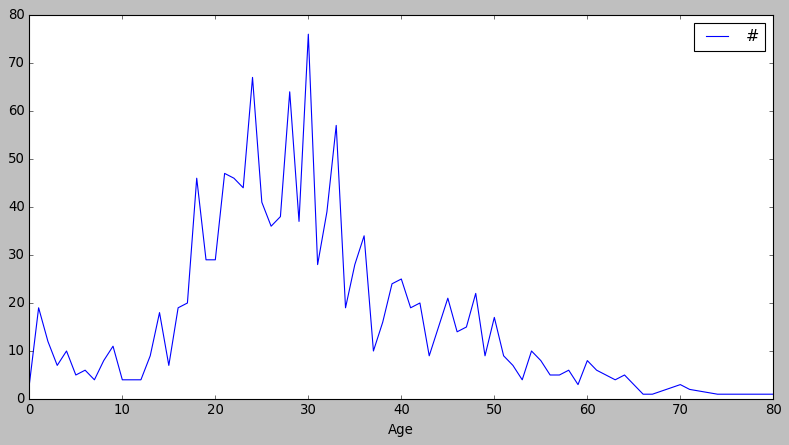

In [16]:
# your code here
#nums=pd.DataFrame(num['Age'])
#nums['#ages'] = nums.groupby(by=['Age']).apply(lambda x: int(x['Age']))['Age'].value_counts()
 
num_s = num.sort_values(by='Age').apply(lambda x: round(x)).groupby(by=['Age'])['Age'].value_counts()

df = pd.DataFrame(num_s, columns= ['Age'])
df = df.droplevel(level = 0)
df = df.rename(columns={'Age': '#'})
df = df.reset_index()

df.plot(x='Age', figsize=(12,6))
#plt.xticks(list(range(int(min(num['Age'])), int(max(num['Age']))+1, 10)))


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001708D1C59C8>],
      dtype=object)

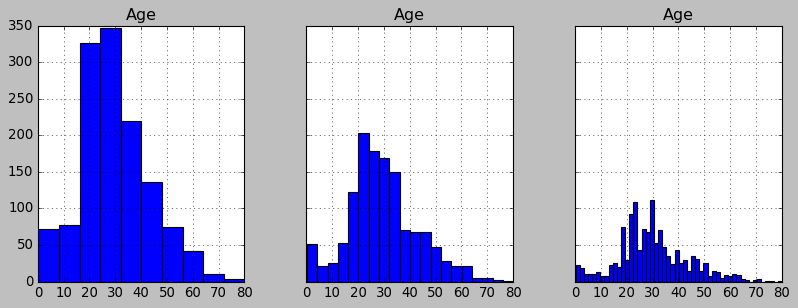

In [17]:
# your code here
f, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))
num.hist(column='Age', ax=ax[0], bins=10)
num.hist(column='Age', ax=ax[1], bins=20)
num.hist(column='Age', ax=ax[2], bins=50)


#### How does the bin size affect your plot?

In [18]:
"""
your comments here
It's the numbers of bars. More bins are more accurate, but more noisy.
Less bins are easier to see, but rounds the results, being less accurate.

"""

"\nyour comments here\nIt's the numbers of bars. More bins are more accurate, but more noisy.\nLess bins are easier to see, but rounds the results, being less accurate.\n\n"

#### Use seaborn to show the distribution of column `Age`.

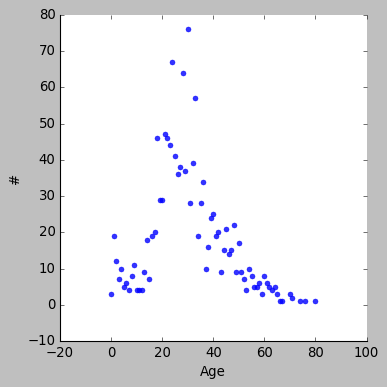

In [19]:
# your code here
sns.lmplot(x = 'Age', y = '#', data=df, fit_reg=False)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

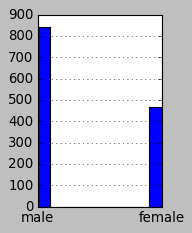

In [20]:
# Method 1 - matplotlib
# your code here
cat['Gender'].hist(figsize=(2,3))

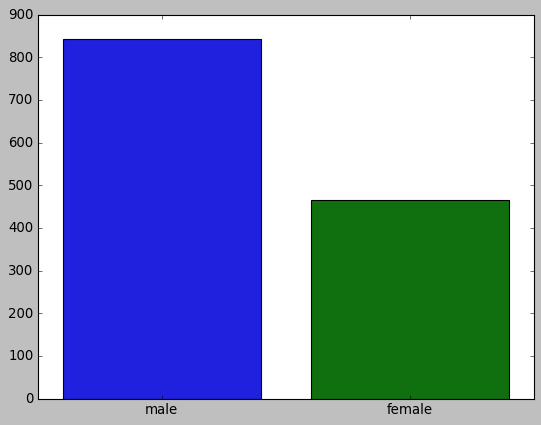

In [21]:
# Method 2 - seaborn
# your code here
genders = cat['Gender'].value_counts()
gens = ['male', 'female']
gender = pd.DataFrame(genders)
gender = gender.T
sns.barplot(data = gender)

#### Use the right plot to visualize the column `Pclass`.

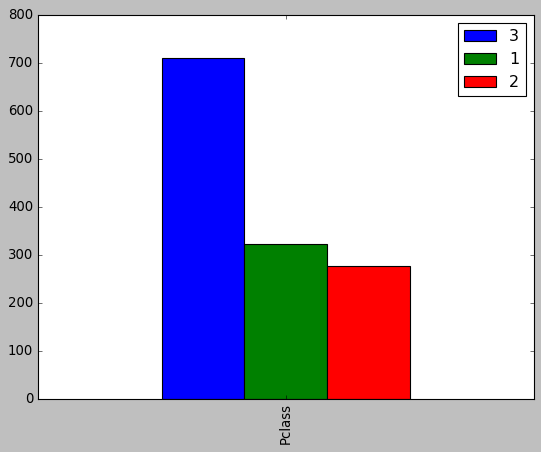

In [22]:
# your code here
classes = titanic['Pclass'].value_counts()
classes = pd.DataFrame(classes)
classes = classes.T
classes.plot.bar()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

C:\Users\felip\Miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\felip\Miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


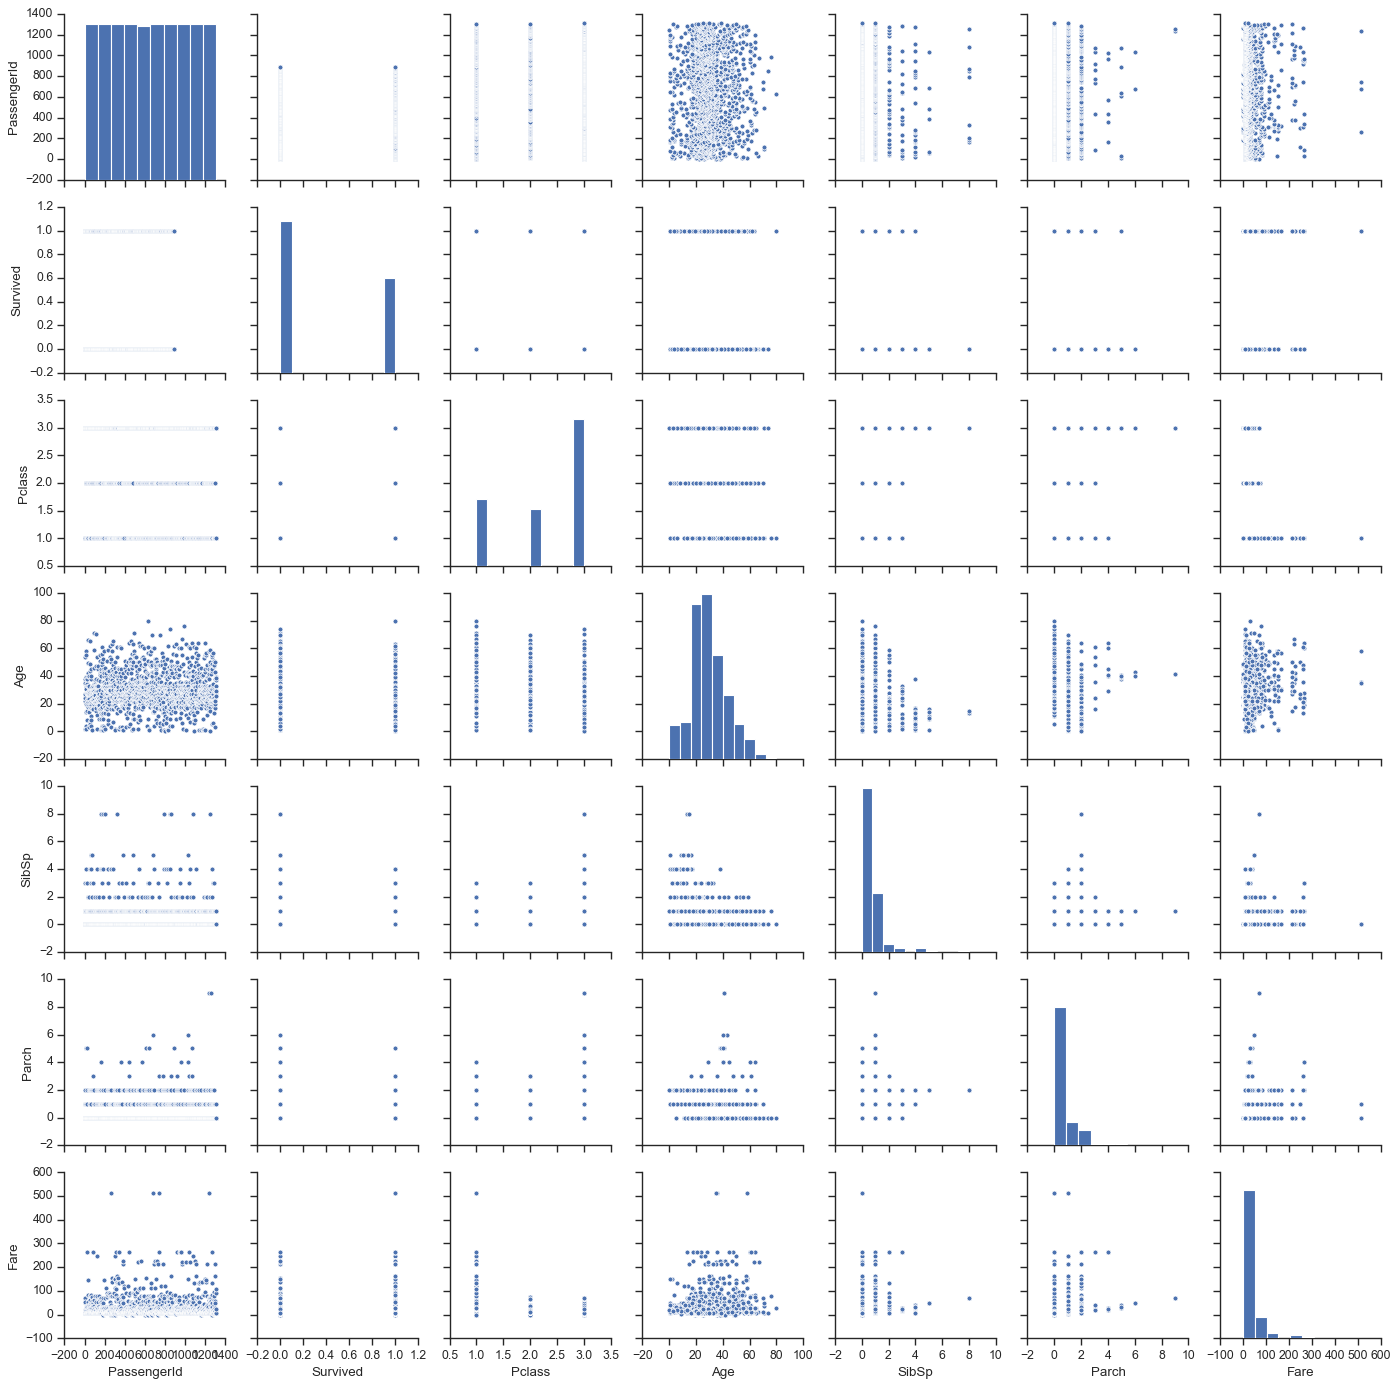

In [23]:
# your code here
sns.set(style="ticks")
sns.pairplot(titanic)


In [24]:
"""
your comments here
The pairplot analyses and compares all the columns.
Now all we have to do is to look at the "Age" row to have all our information.
"""

'\nyour comments here\nThe pairplot analyses and compares all the columns.\nNow all we have to do is to look at the "Age" row to have all our information.\n'

#### What does the last plot tell you about the feature `Age`?

In [25]:
"""
your comments here
That the majority were between 20-40, they were also the ones with more parents/children aboard.
The youngest were the ones with more siblings aboard.
"""

'\nyour comments here\nThat the majority were between 20-40, they were also the ones with more parents/children aboard.\nThe youngest were the ones with more siblings aboard.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [26]:
# your code here
# the distribution of age is alreary in the plot Age x Age

#### What additional information does the last plot provide about feature `Age`?

In [27]:
"""
your comments here
That the most commom ages were in the range 20-40.
"""

'\nyour comments here\nThat the most commom ages were in the range 20-40.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Values')

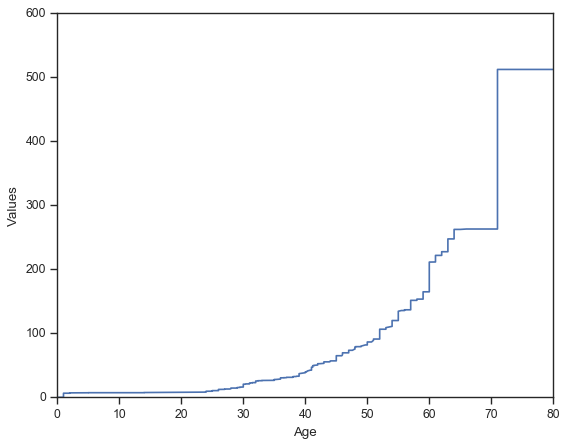

In [28]:
# Method 1 - matplotlib
# your code here
ordered_age = titanic['Age'].sort_values()
ordered_values = titanic['Fare'].sort_values()
#plt.plot(ordered_age, label='Age')
plt.plot(ordered_age, ordered_values)
plt.xlabel('Age')
plt.ylabel('Values')
#plt.legend()
#plt.show()

#df = pd.DataFrame({'USA': to_euros, 'Lisbon': in_lisb}, index=job_titles)
#ordered_age.hist(bins=20)
#ordered_values.hist(bins=20)

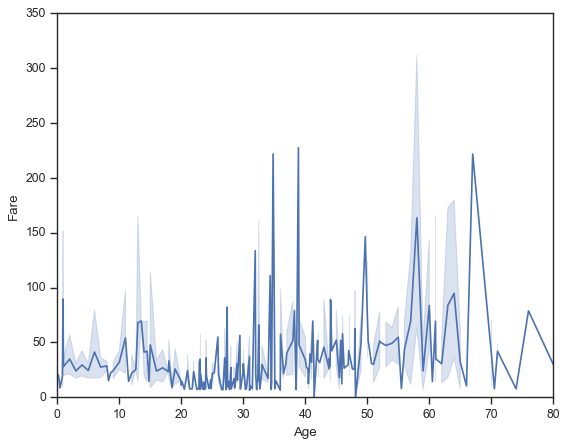

In [29]:
# Method 2 - seaborn
# your code here
sns.lineplot(x = ordered_age , y = ordered_values)

#### Plot the correlation matrix using seaborn.

C:\Users\felip\Miniconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\felip\Miniconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


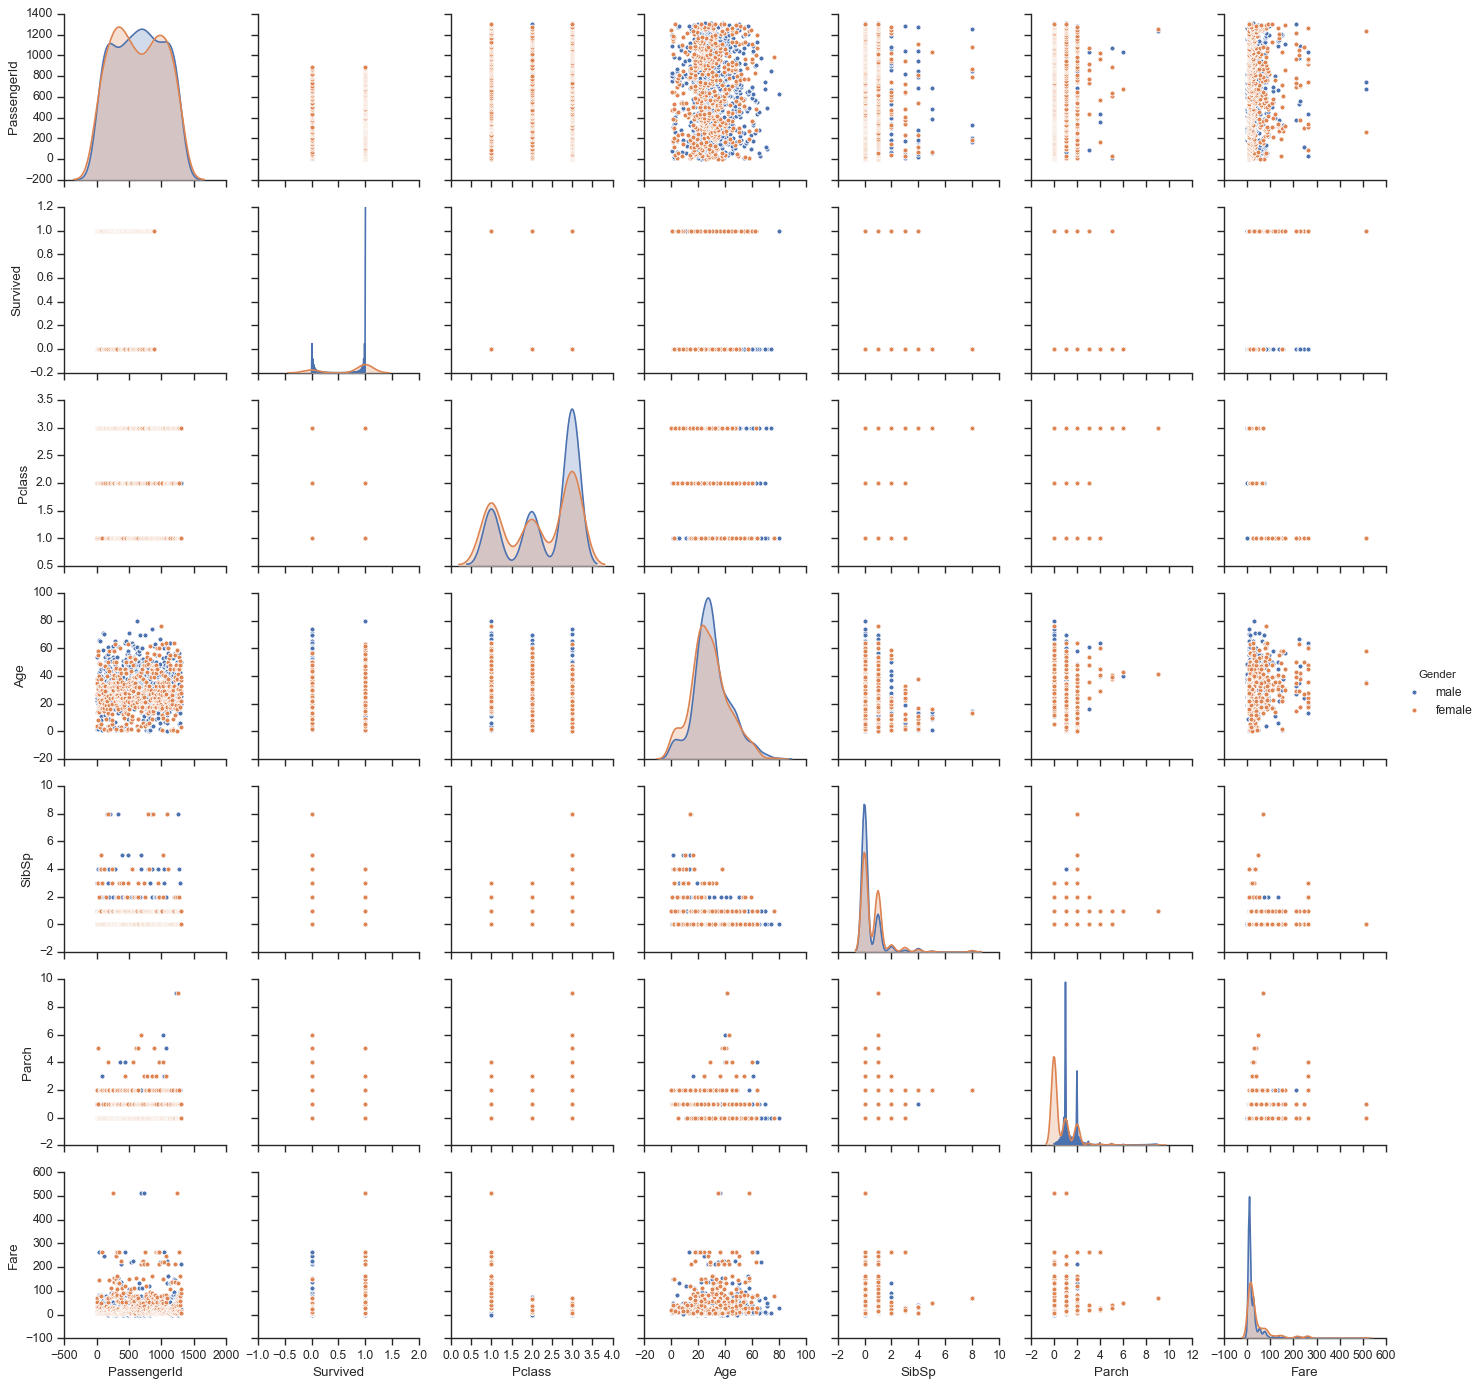

In [30]:
# your code here
sns.set(style="ticks")
sns.pairplot(titanic, hue="Gender")

#### What are the most correlated features?

In [31]:
"""
your comments here
Age and parents / siblings.
Age and fare.
Gender and survival.
Gender and Fare.
"""

'\nyour comments here\nAge and parents / siblings.\nAge and fare.\nGender and survival.\nGender and Fare.\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

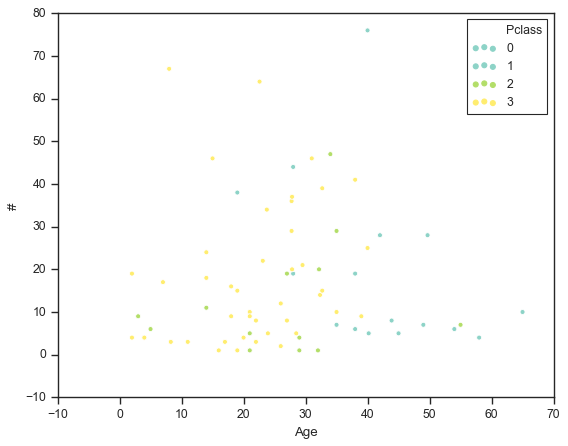

In [32]:
# your code here
#plt.plot(df['Age'], df['#'], label='age')
#plt.plot(titanic['Pclass'], label='Class') 
#plt.legend()

#num_ss = num.sort_values(by='Age').apply(lambda x: round(x)).groupby(by=['Age', 'Pclass'])['Age'].value_counts()

#dfs = pd.DataFrame(num_ss, columns= ['Age'])
#dfs = dfs.droplevel(level = 0)
#dfs = dfs.rename(columns={'Age': '#'})
#dfs = dfs.reset_index()
#dfs

sns.scatterplot(x=titanic['Age'], y=df['#'], hue=titanic["Pclass"], palette="Set3")

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

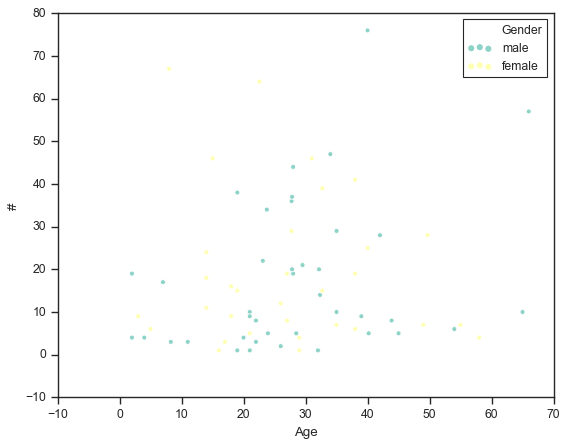

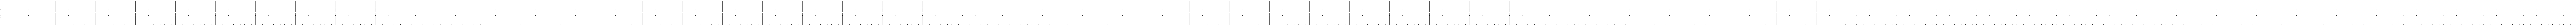

In [36]:
# your code here
sns.scatterplot(x=titanic['Age'], y=df['#'], hue=titanic["Gender"], palette="Set3")
#sns.FacetGrid(titanic, col='Age', row='Gender')